In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import collections

In [4]:
# Dataframe loading
data = pd.read_csv('/content/Image Automatic Colorization Turing Test.csv', sep=",", na_values=' ')

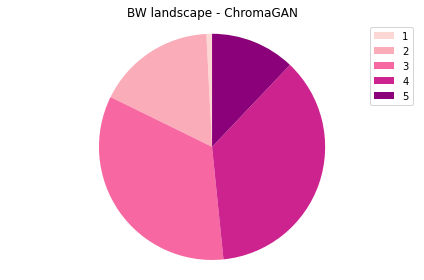

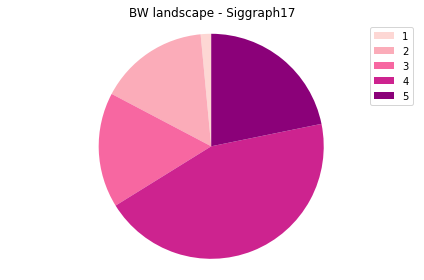

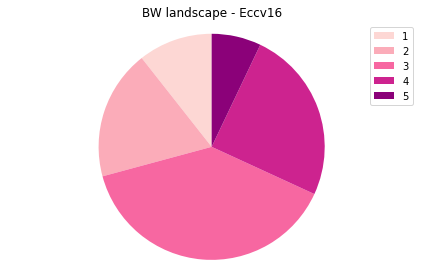

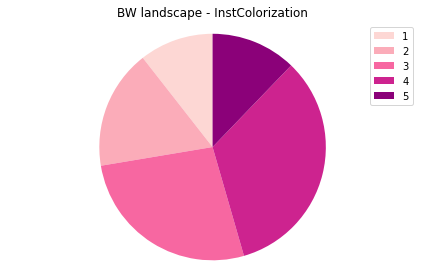

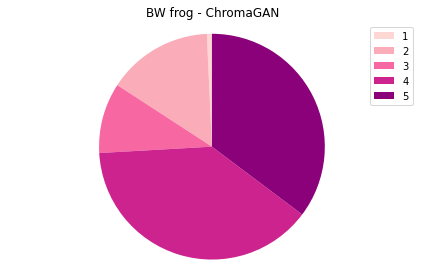

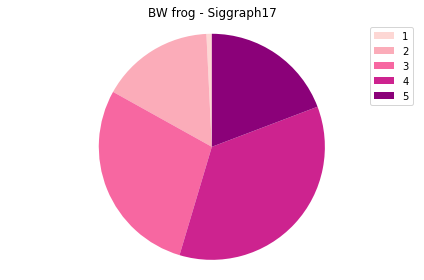

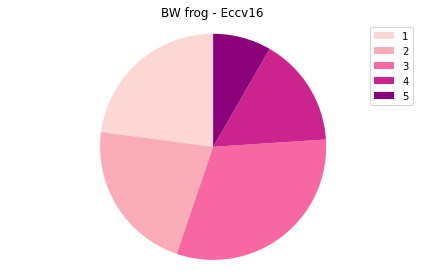

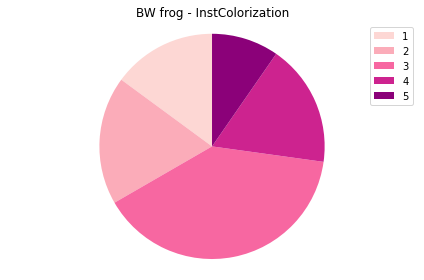

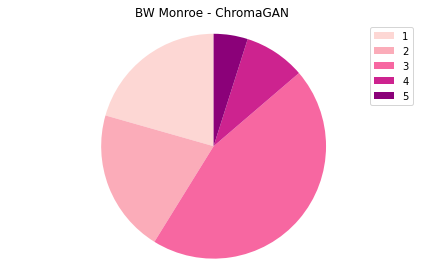

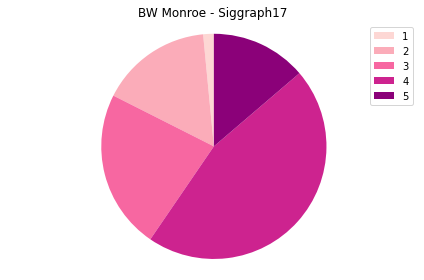

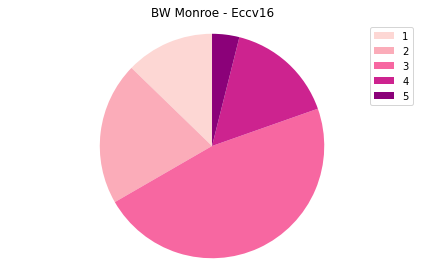

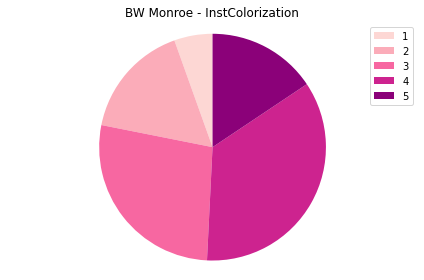

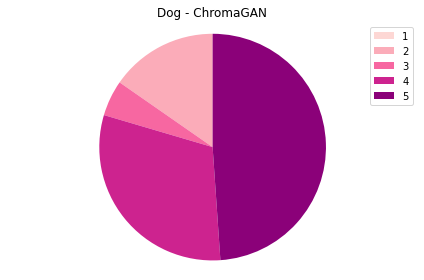

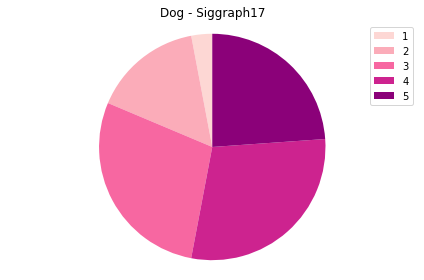

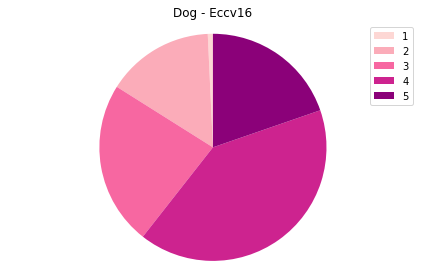

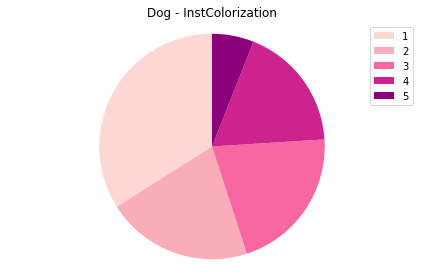

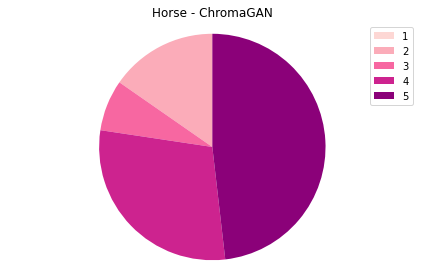

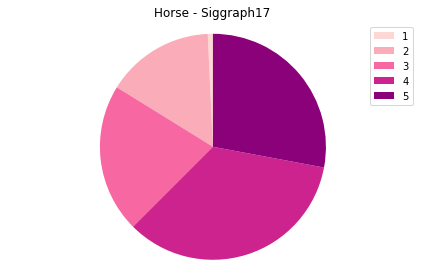

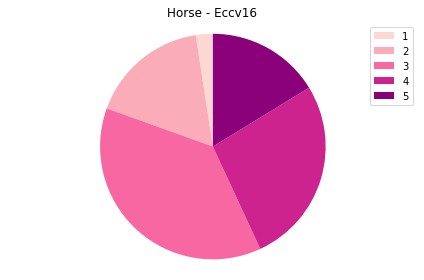

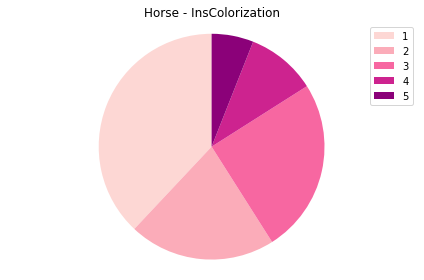

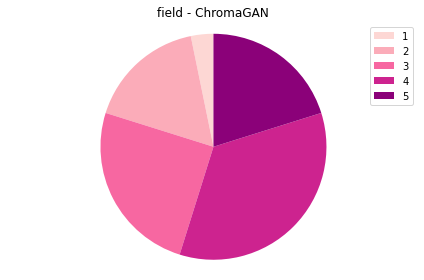

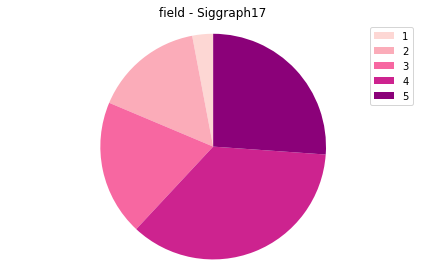

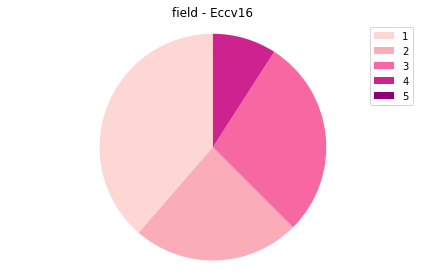

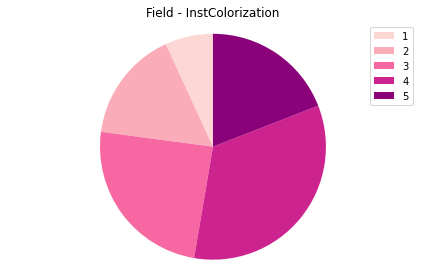

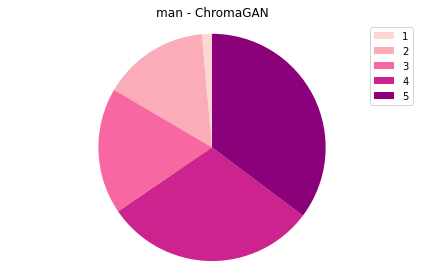

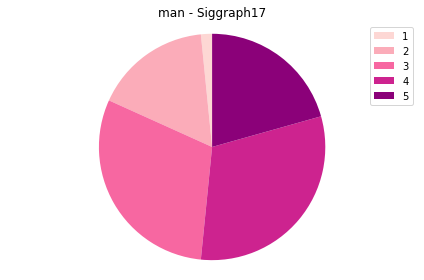

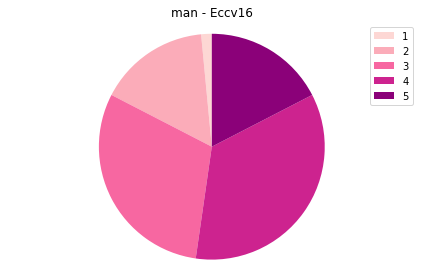

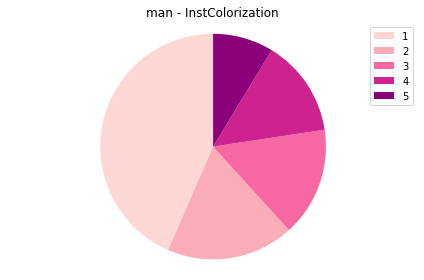

In [ ]:
# PIE CHART FOR EACH MODEL ON EACH IMAGE
for column in range(1, data.shape[1]):
  labels = ['1', '2', '3', '4', '5']
  sizes = [collections.Counter(data.iloc[:,column])[1], collections.Counter(data.iloc[:,1])[2], 
          collections.Counter(data.iloc[:,column])[3], collections.Counter(data.iloc[:,column])[4],
          collections.Counter(data.iloc[:,column])[5]]
  patches, texts = plt.pie(sizes, colors= sns.color_palette("RdPu", 5), startangle=90)
  plt.legend(patches, labels, loc="best")
  plt.title(data.columns[column])
  plt.axis('equal')
  plt.tight_layout()
  plt.show()

In [5]:
def plot_mean(Chroma_mean, Siggraph_mean, Eccv_mean, Su_mean, Chroma_std, Siggraph_std, Eccv_std, Su_std, images, title):
  plt.figure(figsize=(14, 4), dpi=80)
  plt.title(title)
  plt.plot(images, Chroma_mean, 'o--',label = "ChromaGAN", color="lime")
  plt.plot(images, Siggraph_mean, 'o--', label = "Siggraph17", color="deeppink")
  plt.plot(images, Eccv_mean, 'o--', label = "Eccv16", color="cyan")
  plt.plot(images, Su_mean, 'o--', label = "InstColorization", color="blue")
  #plt.fill_between(images, Chroma_mean - Chroma_std, Chroma_mean + Chroma_std, color='lime', alpha=0.05)
  #plt.fill_between(images, Siggraph_mean - Siggraph_std, Siggraph_mean + Siggraph_std, color='deeppink', alpha=0.05)
  #plt.fill_between(images, Eccv_mean - Eccv_std, Eccv_mean + Eccv_std, color='cyan', alpha=0.05)
  #plt.fill_between(images, Su_mean - Su_std, Su_mean + Su_std, color='blue', alpha=0.05)
  plt.xticks(rotation=30)
  plt.legend()
  plt.show()

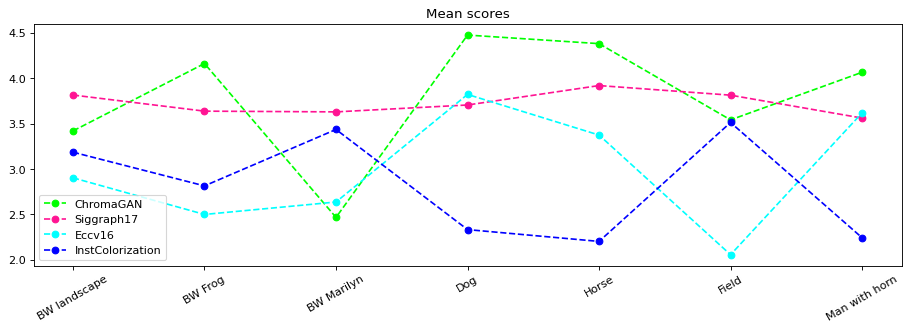

In [6]:
mean = np.empty((4,7))
std = np.empty((4,7))
for model in [0,1,2,3]:
  for image in [0,1,2,3,4,5,6]:
    x = data.iloc[:,model+1+image*4].values
    x = x[~np.isnan(x)]
    m = x.mean()
    s = x.std()
    mean[model,image] = m
    std[model,image] = s

plot_mean(mean[0,:], mean[1,:], mean[2,:], mean[3,:], std[0,:], std[1,:], std[2,:], std[3,:], ["BW landscape", "BW Frog", "BW Marilyn", "Dog", "Horse", "Field", "Man with horn" ], "Mean scores")

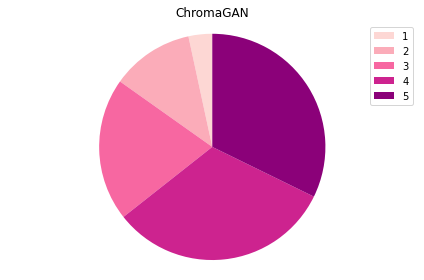

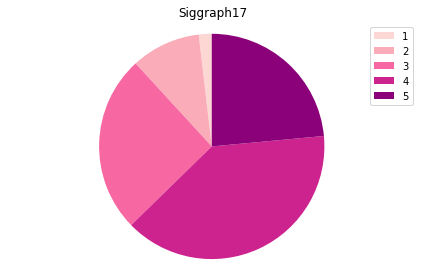

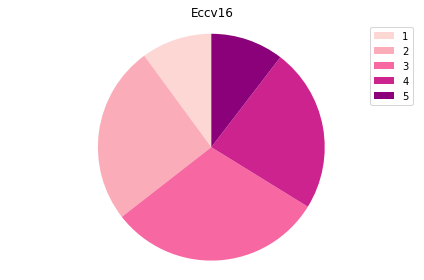

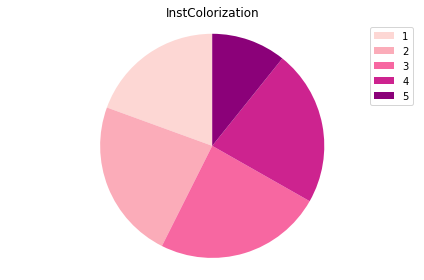

In [7]:
# PIE CHART FOR EACH MODEL ON ALL IMAGES
models = ['ChromaGAN', "Siggraph17", "Eccv16", "InstColorization"]
for column in range(1, 5):
  labels = ['1', '2', '3', '4', '5']
  sizes = []
  for i in range(1,6):
    sizes.append(collections.Counter(data.iloc[:,column])[i] + collections.Counter(data.iloc[:,column+4])[i] +
           collections.Counter(data.iloc[:,column+8])[i] + collections.Counter(data.iloc[:,column+12])[i] +
           collections.Counter(data.iloc[:,column+16])[i] + collections.Counter(data.iloc[:,column+20])[i] +
           collections.Counter(data.iloc[:,column+24])[i])
  patches, texts = plt.pie(sizes, colors= sns.color_palette("RdPu", 5), startangle=90)
  plt.legend(patches, labels, loc="best")
  plt.title(models[column-1])
  plt.axis('equal')
  plt.tight_layout()
  plt.show()

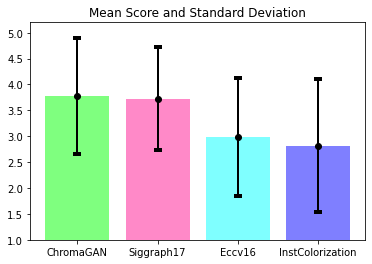

In [8]:
# ALL IMAGES
means = []
devs = []
for model in [0,1,2,3]:
  x = data.iloc[:,model+1].values
  x = x[~np.isnan(x)]
  for image in [1,2,3,4,5,6]:
    y = data.iloc[:,model+1+image*4].values
    y = y[~np.isnan(y)]
    x = np.concatenate([x,y])

  means.append(x.mean())
  devs.append(x.std())

labels = ('ChromaGAN', "Siggraph17", "Eccv16", "InstColorization")
colors = ['lime','deeppink', 'cyan', 'blue']
 

fig, ax = plt.subplots()
 
# plotting the bar plot
ax.bar(labels, means, alpha=0.5, color=colors)
ax.errorbar(labels, means, devs, fmt='o',lw = 2,capsize = 4, capthick = 4,color = 'black')
plt.ylim([1,5.2])
plt.title("Mean Score and Standard Deviation")
plt.show()

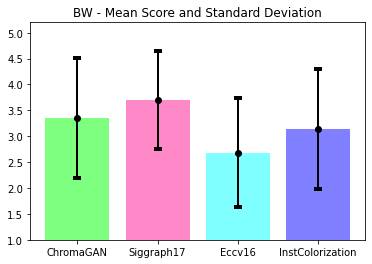

In [9]:
# BW IMAGES
means = []
devs = []
for model in [0,1,2,3]:
  x = data.iloc[:,model+1].values
  x = x[~np.isnan(x)]
  for image in [1,2]:
    y = data.iloc[:,model+1+image*4].values
    y = y[~np.isnan(y)]
    x = np.concatenate([x,y])

  means.append(x.mean())
  devs.append(x.std())

labels = ('ChromaGAN', "Siggraph17", "Eccv16", "InstColorization")
colors = ['lime','deeppink', 'cyan', 'blue']
 

fig, ax = plt.subplots()
 
# plotting the bar plot
ax.bar(labels, means, alpha=0.5, color=colors)
ax.errorbar(labels, means, devs, fmt='o',lw = 2,capsize = 4, capthick = 4,color = 'black')
plt.ylim([1,5.2])
plt.title("BW - Mean Score and Standard Deviation")
plt.show()

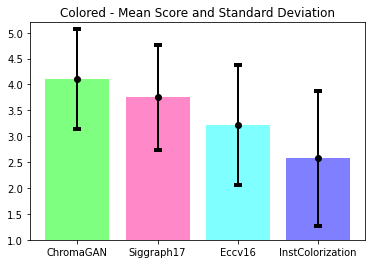

In [10]:
# COLORED IMAGES
means = []
devs = []
for model in [0,1,2,3]:
  x = data.iloc[:,model+1+3*4].values
  x = x[~np.isnan(x)]
  for image in [4,5,6]:
    y = data.iloc[:,model+1+image*4].values
    y = y[~np.isnan(y)]
    x = np.concatenate([x,y])

  means.append(x.mean())
  devs.append(x.std())

labels = ('ChromaGAN', "Siggraph17", "Eccv16", "InstColorization")
colors = ['lime','deeppink', 'cyan', 'blue']
 

fig, ax = plt.subplots()
 
# plotting the bar plot
ax.bar(labels, means, alpha=0.5, color=colors)
ax.errorbar(labels, means, devs, fmt='o',lw = 2,capsize = 4, capthick = 4,color = 'black')
plt.ylim([1,5.2])
plt.title("Colored - Mean Score and Standard Deviation")
plt.show()